# HW3 - Decision Tree & Random Forest
##### 負責助教：張逸群 toosyou.tw@gmail.com
 
> 這次的作業將帶大家建立食譜分類器，用食譜的成分預測此份食譜是屬於哪種類別

---

## 資料簡介
Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

---

#### 姓名：李天寧
#### 學號：109705002

## Packages that Might Be Used

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import difflib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [re](https://docs.python.org/zh-cn/3/library/re.html)
    * [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    * [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
    * [difflib](https://docs.python.org/2/library/difflib.html)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html)
    * [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    * [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    * [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

### Package 解釋 - 10%

請**簡述**以下問題，將 **ans** 取代為你的答案

1. CountVectorizer 和 LabelEncoder 的用途各自為何？  - 5%
   * CountVectorizer根據文本去建立字典，根據每個詞語的出現頻率轉換成矩陣
   * LabelEncoder對目標標籤進行編號
2. 以上兩種有什麼區別？ - 5%
    * CountVectorizer是把字串變成矩陣，可看出一個文本中某個單字出現的頻率
    * LabelEncoder則是把非數值的數據轉換成編號
    

## Load Data - 10%

#### 請使用 `pandas` 套件，讀取 `data.json` 檔案成 `DataFrame` 並取名為 `df`

In [7]:
df = pd.read_json('data.json')

#### 請將 `df` 前五個 __row__ 印出來 - 5%

In [8]:
df[0:5]

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


#### 請將 `df` row 的數量印出來 - 5%

In [9]:
df.count()

id             39774
cuisine        39774
ingredients    39774
dtype: int64

## Statistics - 20%

### Target Value Frequency

#### 請將 `df` 的 cuisine 的 value frequency 印出 - 5%

In [10]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

#### 請將 `df` 的 cuisine 的 value frequency 以圓餅圖（pie chart）方式畫出 - 5%
Hint - [Pandas 有內建畫圖功能](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

<AxesSubplot:ylabel='cuisine'>

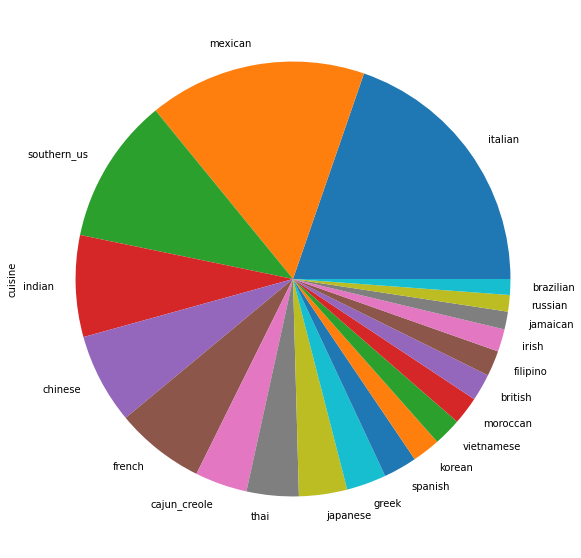

In [11]:
plt.figure(figsize=(20, 10)) # 讓你的圖畫起來可以大大der
df.cuisine.value_counts().plot.pie()

### Ingredients Length Count

#### ↓ 這邊需要注意的是 ```df.ingredients``` 中各個 __row__ 是以 ```list``` 的形式儲存

In [12]:
df.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

#### ↓ Hint - 印出每個 instance（row） 中的 ingredient 個數

In [13]:
df.ingredients.str.len().head()

0     9
1    11
2    12
3     4
4    20
Name: ingredients, dtype: int64

#### 請統計 instance（row） 中的 ingredient 個數的 frequency count，後以 ingredient 個數做排序以長條圖（bar chart）畫出 - 10%
* X 軸需標示 __Number of ingredients__
* y 軸需標示 __Count of recipes__
* [Hint](https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot)

Text(0, 0.5, 'Count of recipes')

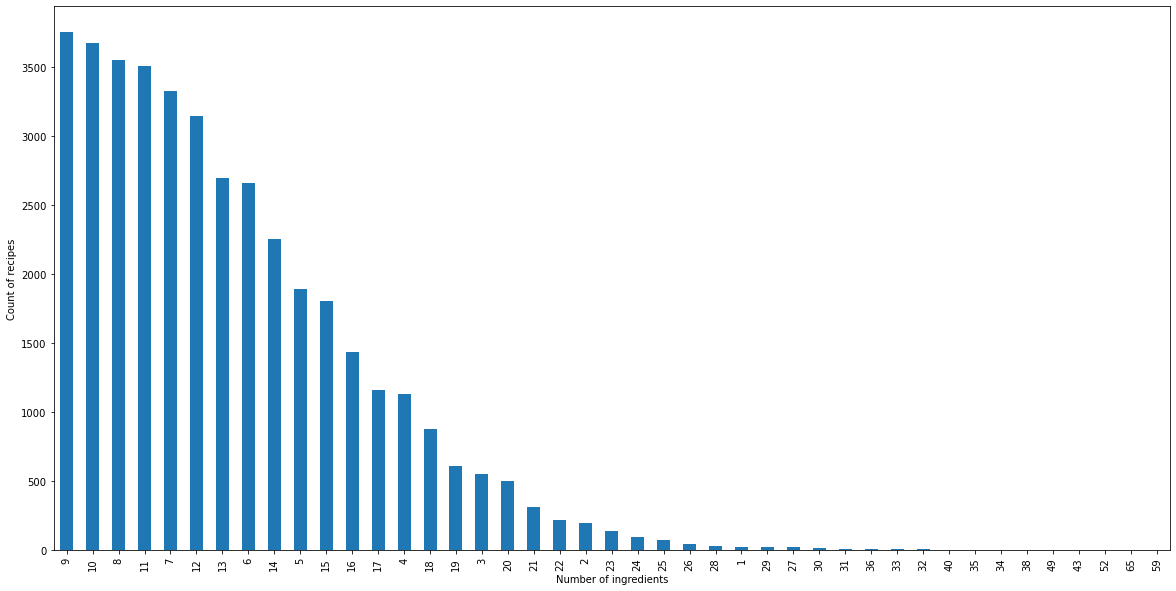

In [14]:
plt.figure(figsize=(20, 10)) # 讓你的圖畫起來可以大大der
y = df.ingredients.str.len().value_counts()
p = y.plot.bar()
p.set_xlabel("Number of ingredients")
p.set_ylabel("Count of recipes")

## Preprocessing - 15%

#### 為ㄌ體恤各位辛勞，ingredients 前處理的部份小ㄉ幫大家處理完ㄌ
* 4 否覺得ㄗˋ教很 bon [Y/n] - 0%
    * Y

In [15]:
def preprocessing(item):
    newitem = []
    for ingr in item:
        ingr = ingr.lower()
        ingr = re.sub("[^a-zA-Z]"," ",ingr)
        ingr = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', ingr)
        newitem.append(ingr)
    return newitem

ingredients_processed = df.ingredients.apply(preprocessing)

#### Q&A - 5%

* 請問上面這個 block 做了什麼事情呢？
    * 個別讀取ingredient
    * 除了a-z以及A-Z的字元都改成空白
    * 將每個字轉成小寫
    * 去除單位
    * 把整理好的新ingredients加到新的陣列newitem裡
* 請問「(1.5 oz.) Tomato Sauce」將變成什麼呢？
    * tomato sauce
* [Hint](https://zh.wikipedia.org/wiki/%E6%AD%A3%E5%88%99%E8%A1%A8%E8%BE%BE%E5%BC%8F)

#### 將資料分為 `X` 以及 `y` （注意習慣上 `X` 為大寫；`y` 為小寫），其中分別代表：
* `X` - classification 問題中的 `feature`
* `y` - classification 問題中的 `target (label)`

In [16]:
X = [str(i) for i in ingredients_processed]
y = df.cuisine # 此菜屬於哪種種類，此為我們的預測目標

#### 接者請分別使用 `CountVectorizer` / `LabelEncoder` 將 `X` 和 `y` 進行 encode，並依格式印出第一個 instance 的資訊 - 5%
* Hint - [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
* Hint - [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [43]:
vectorizer = CountVectorizer()
X_encoder = vectorizer.fit_transform(X)
le = LabelEncoder()
le.fit(y)
y_encoder = le.transform(y)

In [44]:
print('Original:')
print(X[0])

print('Encoded:')
print(X_encoder[0])

print('Inverse Transformed:')
print(vectorizer.inverse_transform(X_encoder[0]))

Original:
['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
Encoded:
  (0, 2281)	1
  (0, 1514)	1
  (0, 237)	1
  (0, 1857)	1
  (0, 1159)	1
  (0, 2757)	1
  (0, 1084)	1
  (0, 1985)	1
  (0, 2169)	1
  (0, 1861)	1
  (0, 2389)	1
  (0, 1078)	1
  (0, 174)	1
  (0, 948)	1
  (0, 512)	1
  (0, 728)	1
Inverse Transformed:
[array(['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes',
       'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo',
       'beans', 'feta', 'cheese', 'crumbles'], dtype='<U16')]


#### 從 `X_encoder` 中取得 Unique Ingredents & 從 `y_encoder` 中取得 Unique Classes - 5%

In [45]:
all_unique_ingredients = vectorizer.get_feature_names()
all_unique_classes = le.classes_

In [46]:
all_unique_ingredients[:10]

['abalone',
 'abbamele',
 'absinthe',
 'abura',
 'acai',
 'accent',
 'accompaniment',
 'achiote',
 'acid',
 'acini']

In [47]:
all_unique_classes

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

## Training - 15%

#### 請將資料以 7:3 比例分為 training / testing set，random_state 請給 42 - 0%
* [Hint](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoder,y_encoder,test_size=0.3,random_state=42)

#### 請建 `Decision Tree` 和 `Random Forest` 共兩個分類器（classifier），分別訓練後將各自 Confusion Matrix 畫出，並將各自 Accuracy, Classification Report 印出 - 10%
* 以 training set 做訓練
* 以 testing set 做 evaluation

Hint - [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)  
Hint - 以下 function 取自[連結](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)，可以將 confusion matrix 畫出

In [23]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

#### Decision Tree

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

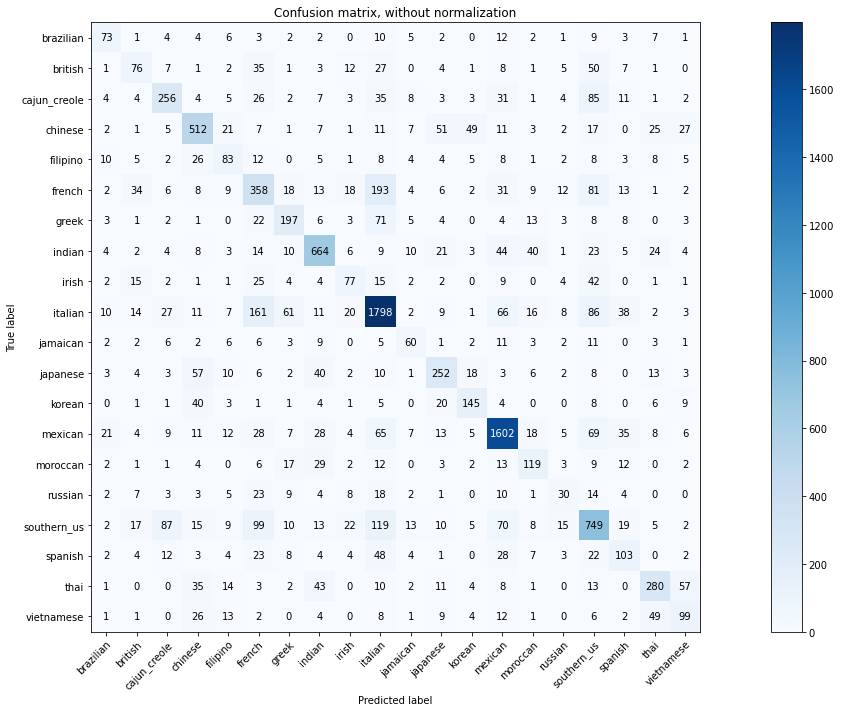

Accuracy: 0.6312746166094025
              precision    recall  f1-score   support

   brazilian       0.50      0.50      0.50       147
     british       0.39      0.31      0.35       242
cajun_creole       0.59      0.52      0.55       495
     chinese       0.66      0.67      0.67       760
    filipino       0.39      0.41      0.40       200
      french       0.42      0.44      0.43       820
       greek       0.55      0.56      0.56       354
      indian       0.74      0.74      0.74       899
       irish       0.42      0.37      0.39       207
     italian       0.73      0.76      0.74      2351
    jamaican       0.44      0.44      0.44       135
    japanese       0.59      0.57      0.58       443
      korean       0.58      0.58      0.58       249
     mexican       0.81      0.82      0.81      1957
    moroccan       0.48      0.50      0.49       237
     russian       0.29      0.21      0.24       144
 southern_us       0.57      0.58      0.57      128

In [24]:
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, all_unique_classes)

print('Accuracy:',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names = all_unique_classes))

#### Random Forest

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

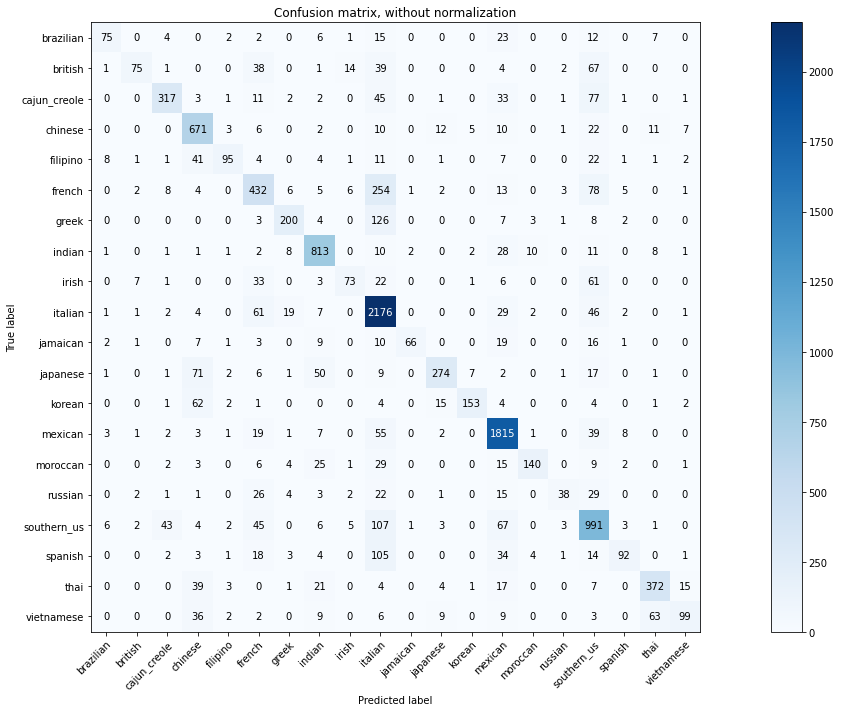

Accuracy: 0.7514455711053382
              precision    recall  f1-score   support

   brazilian       0.77      0.51      0.61       147
     british       0.82      0.31      0.45       242
cajun_creole       0.82      0.64      0.72       495
     chinese       0.70      0.88      0.78       760
    filipino       0.82      0.47      0.60       200
      french       0.60      0.53      0.56       820
       greek       0.80      0.56      0.66       354
      indian       0.83      0.90      0.86       899
       irish       0.71      0.35      0.47       207
     italian       0.71      0.93      0.80      2351
    jamaican       0.94      0.49      0.64       135
    japanese       0.85      0.62      0.71       443
      korean       0.91      0.61      0.73       249
     mexican       0.84      0.93      0.88      1957
    moroccan       0.88      0.59      0.71       237
     russian       0.75      0.26      0.39       144
 southern_us       0.65      0.77      0.70      128

In [26]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix,all_unique_classes)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names = all_unique_classes))

#### Q&A - 5%
* 你如何選擇 model 們的參數？
    * 希望accuracy能夠最高化
* 以 F1 score 來看哪種菜的預測效果最好？
    * mexican

## Prediction - 10%

#### 現在你有一個訓練完的 Random Forest Model 了，現在我們希望你對一道菜進行預測並 **回答問題**：

1. 請到[愛料理](https://icook.tw/?ref=logo)找尋一道你喜歡的菜 **（不可以是「蕃茄肉醬義大利麵」）**
2. 將以下內容改成你的那道菜
3. 以 ```rf_clf``` 進行預測 - 5%

* 請問預測是否正確？你認為為什麼？ - 5%
    * ans

### [和風醬燒雞肉馬鈴薯](https://icook.tw/recipes/371265)
![和風醬燒雞肉馬鈴薯](https://tokyo-kitchen.icook.network/uploads/recipe/cover/371265/72e85990df3e267a.jpg)

#### 食材
* 無骨雞腿肉
* 米酒
* 砂糖
* 蔥絲
* 馬鈴薯 
* 醬油
* 鹽巴
* 檸檬


#### 自行翻譯成類似ㄉ英文
* boneless chicken thigh meat
* rice wine
* sugar
* green onion
* potato
* soy sauce
* salt
* lemon


In [50]:
to_predict_X = vectorizer.transform(['boneless_chicken_thigh_meat rice_wine sugar green_onion potato soy_sauce salt lemon'])

In [51]:
print(to_predict_X)
print(vectorizer.inverse_transform(to_predict_X))

  (0, 1505)	1
  (0, 2112)	1
  (0, 2335)	1
  (0, 2633)	1
[array(['lemon', 'potato', 'salt', 'sugar'], dtype='<U16')]


In [53]:
le.inverse_transform(rf_clf.predict(to_predict_X))

array(['southern_us'], dtype=object)

#### Hint - 可以使用以下指令在 all_unique_ingredients 查詢類似的字串

In [54]:
difflib.get_close_matches('bean sauce', all_unique_ingredients)

['sauce', 'beans', 'sauces']

## Ｕ迷Ｕ想對ㄗˋ教說ㄉ話 - 送分 20%

ㄗˋ教你好U質

![ssss.dynazenon](https://media.tenor.com/images/257f4f0bfc3ae06ef6076906c7f754dd/tenor.gif)